<a href="https://colab.research.google.com/github/Lavanya-INFO5731-Fall2024/Lavanya_INFO5731_Fall2024/blob/main/Nidamanuri_Lavanya_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preparing data for topic modeling...
Preprocessing texts...
Documents after preprocessing: 5796 out of 5796
Vocabulary size before filtering: 135391
Vocabulary size after filtering: 45781
Computing coherence scores for different numbers of topics...
Testing 2 topics...
Testing 3 topics...
Testing 4 topics...
Testing 5 topics...
Testing 6 topics...
Testing 7 topics...
Testing 8 topics...
Testing 9 topics...
Testing 10 topics...


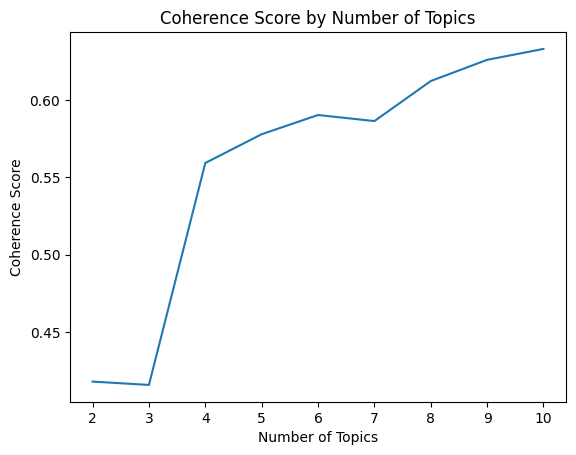


Optimal number of topics: 10
Best coherence score: 0.6328

Top words in each topic:

Topic 1:
1. rpmzzzlistfreshrpmsnet
2. rpmzzzlistadminfreshrpmsnet
3. rpmlistfreshrpmsnet
4. egwnnet
5. aug
6. mon
7. find
8. rpm
9. use
10. file

Topic 2:
1. font
2. table
3. facearial
4. helvetica
5. div
6. border0
7. arial
8. body
9. html
10. sansserif

Topic 3:
1. jul
2. email
3. faceverdanafont
4. free
5. business
6. blockquotefont
7. get
8. grant
9. hqpronsnet
10. address

Topic 4:
1. aug
2. iluglinuxie
3. lughtuathaorg
4. ilugadminlinuxie
5. linux
6. jul
7. tue
8. group
9. fri
10. user

Topic 5:
1. sep
2. forkadminxentcom
3. xentcom
4. forkspamassassintaintorg
5. aug
6. forkxentcom
7. httpxentcommailmanlistinfofork
8. pdt
9. mon
10. jul

Topic 6:
1. oct
2. jalapeno
3. rssfeedsspamassassintaintorg
4. tue
5. thu
6. sep
7. jmasonorg
8. yyyylocalhostspamassassintaintorg
9. jmjmasonorg
10. url

Topic 7:
1. make
2. email
3. get
4. people
5. may
6. work
7. send
8. money
9. report
10. day

Topic 8:
1. t

In [ ]:
import gensim
from gensim.models import CoherenceModel
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
import spacy
import gensim.corpora as corpora
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('stopwords')

class TopicModeler:
    def __init__(self, texts, min_topics=2, max_topics=10, min_word_length=3):
        """
        Initialize the topic modeler
        texts: List of documents (each document is a string)
        min_word_length: Minimum length of words to keep (default: 3)
        """
        self.texts = texts
        self.min_topics = min_topics
        self.max_topics = max_topics
        self.min_word_length = min_word_length
        self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    def preprocess_text(self, text):
        """Clean and preprocess the text"""
        if not text or not isinstance(text, str):
            return []

        # Convert to lowercase, remove special characters, and tokenize
        text = re.sub(r'[^\w\s]', '', text.lower())
        doc = self.nlp(text)

        # Remove stopwords, short words, and digits
        stop_words = set(stopwords.words('english'))
        tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and
                  len(token) >= self.min_word_length and not token.is_digit]

        return tokens

    def prepare_data(self):
        """Prepare the data for topic modeling"""
        print("Preparing data for topic modeling...")
    # Use .empty to check if the Series is empty
        if self.texts.empty:
          raise ValueError("No input texts provided")

        # Preprocess all texts
        print("Preprocessing texts...")
        self.processed_texts = [self.preprocess_text(text) for text in self.texts]

        # Filter out empty documents after preprocessing
        self.processed_texts = [text for text in self.processed_texts if text]
        print(f"Documents after preprocessing: {len(self.processed_texts)} out of {len(self.texts)}")

        if not self.processed_texts:
            raise ValueError("All documents are empty after preprocessing.")

        # Create dictionary
        self.dictionary = corpora.Dictionary(self.processed_texts)
        print(f"Vocabulary size before filtering: {len(self.dictionary)}")

        # Filter extremes
        self.dictionary.filter_extremes(no_below=2, no_above=0.5)
        print(f"Vocabulary size after filtering: {len(self.dictionary)}")

        # Create corpus
        self.corpus = [self.dictionary.doc2bow(text) for text in self.processed_texts]
        return self.corpus, self.dictionary

    def compute_coherence_values(self):
        """Compute coherence scores for different numbers of topics"""
        coherence_values = []
        model_list = []

        print("Computing coherence scores for different numbers of topics...")
        for num_topics in range(self.min_topics, min(self.max_topics + 1, len(self.dictionary))):
            print(f"Testing {num_topics} topics...")
            model = gensim.models.LdaModel(
                corpus=self.corpus,
                num_topics=num_topics,
                id2word=self.dictionary,
                random_state=42,
                passes=10
            )

            coherence_model = CoherenceModel(
                model=model,
                texts=self.processed_texts,
                dictionary=self.dictionary,
                coherence='c_v'
            )

            coherence_values.append(coherence_model.get_coherence())
            model_list.append(model)

        return model_list, coherence_values

    def plot_coherence_values(self, coherence_values):
        """Plot coherence scores"""
        x = range(self.min_topics, self.min_topics + len(coherence_values))
        plt.plot(x, coherence_values)
        plt.xlabel("Number of Topics")
        plt.ylabel("Coherence Score")
        plt.title("Coherence Score by Number of Topics")
        plt.show()

    def get_optimal_model(self, model_list, coherence_values):
        """Get the model with the highest coherence score"""
        optimal_model_index = coherence_values.index(max(coherence_values))
        optimal_model = model_list[optimal_model_index]
        optimal_num_topics = optimal_model_index + self.min_topics

        print(f"\nOptimal number of topics: {optimal_num_topics}")
        print(f"Best coherence score: {max(coherence_values):.4f}")

        return optimal_model

    def print_topics(self, model, num_words=10):
        """Print the topics with their top words"""
        print("\nTop words in each topic:")
        topics = model.show_topics(num_words=num_words)

        for idx, topic in topics:
            words_weights = re.findall(r'"([^"]*)"', topic)
            print(f"\nTopic {idx + 1}:")
            for i, word in enumerate(words_weights, 1):
                print(f"{i}. {word}")

    def run_topic_modeling(self):
        """Run the complete topic modeling process"""
        try:
            self.prepare_data()
            model_list, coherence_values = self.compute_coherence_values()
            self.plot_coherence_values(coherence_values)
            optimal_model = self.get_optimal_model(model_list, coherence_values)
            self.print_topics(optimal_model)
            return optimal_model
        except Exception as e:
            print(f"Error during topic modeling: {str(e)}")
            raise

def main():
    texts = pd.read_csv('spam_assaain.csv')['text']

    topic_modeler = TopicModeler(texts, min_topics=2, max_topics=10)
    optimal_model = topic_modeler.run_topic_modeling()
    return optimal_model

if __name__ == "__main__":
    main()


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preparing data for topic modeling...
Preprocessing texts...
Documents after preprocessing: 5796 out of 5796
Vocabulary size before filtering: 135391
Vocabulary size after filtering: 45781
Computing coherence scores for different numbers of topics...
Testing 2 topics...
Testing 3 topics...
Testing 4 topics...
Testing 5 topics...
Testing 7 topics...
Testing 8 topics...
Testing 9 topics...
Testing 10 topics...


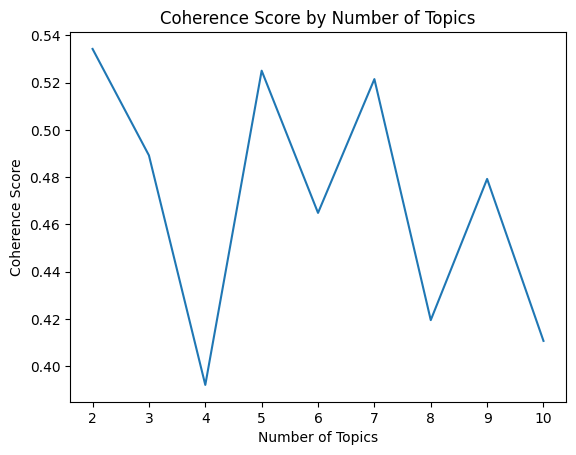


Optimal number of topics: 2
Best coherence score: 0.5342

Top words in each topic:

Topic 1:
1. use (weight: 0.1937)
2. faceverdanafont (weight: 0.1928)
3. make (weight: 0.1680)
4. file (weight: 0.1664)
5. change (weight: 0.1636)
6. new (weight: 0.1490)
7. aug (weight: 0.1473)
8. blockquotefont (weight: 0.1451)
9. email (weight: 0.1430)
10. get (weight: 0.1402)

Topic 2:
1. faceverdanafont (weight: 0.4652)
2. blockquotefont (weight: 0.3500)
3. grant (weight: 0.2705)
4. file (weight: -0.2529)
5. business (weight: 0.2314)
6. change (weight: -0.2304)
7. unison (weight: -0.1954)
8. preference (weight: -0.1548)
9. money (weight: 0.1378)
10. government (weight: 0.1312)


In [ ]:
# Write your code here
import gensim
from gensim.models import CoherenceModel, LsiModel
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
import spacy
import gensim.corpora as corpora
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('stopwords')

class TopicModelerLSA:
    def __init__(self, texts, min_topics=2, max_topics=10, min_word_length=3):
        """
        Initialize the topic modeler for LSA.
        texts: List of documents (each document is a string)
        min_word_length: Minimum length of words to keep (default: 3)
        """
        self.texts = texts
        self.min_topics = min_topics
        self.max_topics = max_topics
        self.min_word_length = min_word_length
        self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    def preprocess_text(self, text):
        """Clean and preprocess the text"""
        if not text or not isinstance(text, str):
            return []

        # Convert to lowercase, remove special characters, and tokenize
        text = re.sub(r'[^\w\s]', '', text.lower())
        doc = self.nlp(text)

        # Remove stopwords, short words, and digits
        stop_words = set(stopwords.words('english'))
        tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and
                  len(token) >= self.min_word_length and not token.is_digit]

        return tokens

    def prepare_data(self):
        """Prepare data for LSA"""
        print("Preparing data for topic modeling...")
        if self.texts.empty:
            raise ValueError("No input texts provided")

        # Preprocess all texts
        print("Preprocessing texts...")
        self.processed_texts = [self.preprocess_text(text) for text in self.texts]

        # Filter out empty documents after preprocessing
        self.processed_texts = [text for text in self.processed_texts if text]
        print(f"Documents after preprocessing: {len(self.processed_texts)} out of {len(self.texts)}")

        if not self.processed_texts:
            raise ValueError("All documents are empty after preprocessing.")

        # Create dictionary
        self.dictionary = corpora.Dictionary(self.processed_texts)
        print(f"Vocabulary size before filtering: {len(self.dictionary)}")

        # Filter extremes
        self.dictionary.filter_extremes(no_below=2, no_above=0.5)
        print(f"Vocabulary size after filtering: {len(self.dictionary)}")

        # Create corpus
        self.corpus = [self.dictionary.doc2bow(text) for text in self.processed_texts]
        return self.corpus, self.dictionary

    def compute_coherence_values(self):
        """Compute coherence scores for different numbers of topics using LSA"""
        coherence_values = []
        model_list = []

        print("Computing coherence scores for different numbers of topics...")
        for num_topics in range(self.min_topics, min(self.max_topics + 1, len(self.dictionary))):
            print(f"Testing {num_topics} topics...")
            model = LsiModel(
                corpus=self.corpus,
                num_topics=num_topics,
                id2word=self.dictionary
            )

            coherence_model = CoherenceModel(
                model=model,
                texts=self.processed_texts,
                dictionary=self.dictionary,
                coherence='c_v'
            )

            coherence_values.append(coherence_model.get_coherence())
            model_list.append(model)

        return model_list, coherence_values

    def plot_coherence_values(self, coherence_values):
        """Plot coherence scores"""
        x = range(self.min_topics, self.min_topics + len(coherence_values))
        plt.plot(x, coherence_values)
        plt.xlabel("Number of Topics")
        plt.ylabel("Coherence Score")
        plt.title("Coherence Score by Number of Topics")
        plt.show()

    def get_optimal_model(self, model_list, coherence_values):
        """Get the model with the highest coherence score"""
        optimal_model_index = coherence_values.index(max(coherence_values))
        optimal_model = model_list[optimal_model_index]
        optimal_num_topics = optimal_model_index + self.min_topics

        print(f"\nOptimal number of topics: {optimal_num_topics}")
        print(f"Best coherence score: {max(coherence_values):.4f}")

        return optimal_model

    def print_topics(self, model, num_words=10):
        """Print the topics with their top words"""
        print("\nTop words in each topic:")
        topics = model.show_topics(formatted=False, num_words=num_words)

        for idx, topic in topics:
            print(f"\nTopic {idx + 1}:")
            for i, (word, weight) in enumerate(topic, 1):
                print(f"{i}. {word} (weight: {weight:.4f})")

    def run_topic_modeling(self):
        """Run the complete topic modeling process"""
        try:
            self.prepare_data()
            model_list, coherence_values = self.compute_coherence_values()
            self.plot_coherence_values(coherence_values)
            optimal_model = self.get_optimal_model(model_list, coherence_values)
            self.print_topics(optimal_model)
            return optimal_model
        except Exception as e:
            print(f"Error during topic modeling: {str(e)}")
            raise

def main():
    # Sample texts (replace with your actual data)
    texts = pd.read_csv('spam_assaain.csv')['text']

    topic_modeler = TopicModelerLSA(texts, min_topics=2, max_topics=10)
    optimal_model = topic_modeler.run_topic_modeling()
    return optimal_model

if __name__ == "__main__":
    main()


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preparing data for topic modeling...
Preprocessing texts...
Documents after preprocessing: 5796 out of 5796
Generating embeddings...


Batches:   0%|          | 0/182 [00:00<?, ?it/s]

Computing coherence scores for different numbers of topics...
Testing 2 topics...
Testing 3 topics...
Testing 4 topics...
Testing 5 topics...


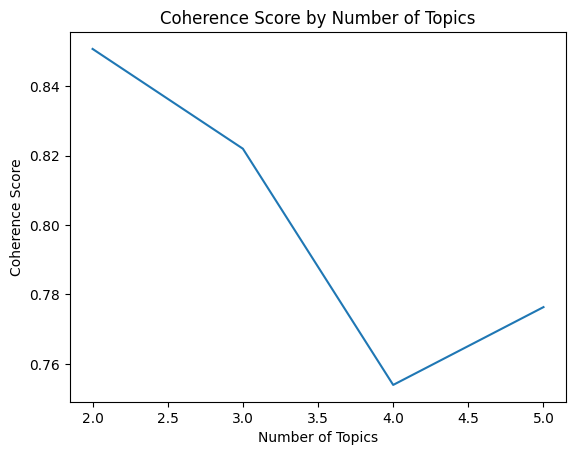


Optimal number of topics: 2
Best coherence score: 0.8507

Top words in each topic:

Topic 1:
1. receive (weight: 0.0605)
2. aug (weight: 0.0343)
3. esmtp (weight: 0.0340)
4. jul (weight: 0.0313)
5. localhost (weight: 0.0303)
6. email (weight: 0.0263)
7. table (weight: 0.0248)
8. mon (weight: 0.0241)
9. may (weight: 0.0236)
10. subject (weight: 0.0206)

Topic 2:
1. receive (weight: 0.0727)
2. esmtp (weight: 0.0481)
3. localhost (weight: 0.0417)
4. aug (weight: 0.0398)
5. sep (weight: 0.0353)
6. jul (weight: 0.0286)
7. postfix (weight: 0.0276)
8. mon (weight: 0.0271)
9. jmlocalhost (weight: 0.0253)
10. tue (weight: 0.0244)


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from gensim.models import CoherenceModel
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import spacy
import gensim.corpora as corpora
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('stopwords')

class TopicModelerBERTopic:
    def __init__(self, texts, min_topics=2, max_topics=5, min_word_length=3):
        """
        Initialize the topic modeler for BERTopic.
        texts: List of documents (each document is a string)
        min_word_length: Minimum length of words to keep (default: 3)
        """
        self.texts = texts
        self.min_topics = min_topics
        self.max_topics = max_topics
        self.min_word_length = min_word_length
        self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    def preprocess_text(self, text):
        """Clean and preprocess the text"""
        if not text or not isinstance(text, str):
            return []

        # Convert to lowercase, remove special characters, and tokenize
        text = re.sub(r'[^\w\s]', '', text.lower())
        doc = self.nlp(text)

        # Remove stopwords, short words, and digits
        stop_words = set(stopwords.words('english'))
        tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and
                  len(token) >= self.min_word_length and not token.is_digit]

        return ' '.join(tokens)

    def prepare_data(self):
        """Prepare data for BERTopic"""
        print("Preparing data for topic modeling...")
        if self.texts.empty:
            raise ValueError("No input texts provided")

        # Preprocess all texts
        print("Preprocessing texts...")
        self.processed_texts = [self.preprocess_text(text) for text in self.texts]

        # Filter out empty documents after preprocessing
        self.processed_texts = [text for text in self.processed_texts if text]
        print(f"Documents after preprocessing: {len(self.processed_texts)} out of {len(self.texts)}")

        if not self.processed_texts:
            raise ValueError("All documents are empty after preprocessing.")

        return self.processed_texts

    def compute_coherence_values(self, embeddings):
        """Compute coherence scores for different numbers of topics using BERTopic"""
        coherence_values = []
        model_list = []

        print("Computing coherence scores for different numbers of topics...")
        for num_topics in range(self.min_topics, self.max_topics + 1):
            print(f"Testing {num_topics} topics...")
            topic_model = BERTopic(nr_topics=num_topics)
            topics, _ = topic_model.fit_transform(self.processed_texts, embeddings=embeddings)

            # Extract topics for coherence calculation
            topics_for_coherence = []
            all_topics = topic_model.get_topics()

            if all_topics:
                for i in range(num_topics):
                    topic_words = all_topics.get(i)
                    if topic_words:
                        words = [word for word, _ in topic_words]
                        topics_for_coherence.append(words)

                # Calculate coherence only if valid topics are extracted
                coherence_model = CoherenceModel(
                    topics=topics_for_coherence,
                    texts=[text.split() for text in self.processed_texts],
                    dictionary=corpora.Dictionary([text.split() for text in self.processed_texts]),
                    coherence='c_v'
                )
                coherence_values.append(coherence_model.get_coherence())
                model_list.append(topic_model)
            else:
                print("No valid topics found; skipping coherence calculation for this model.")

        return model_list, coherence_values

    def plot_coherence_values(self, coherence_values):
        """Plot coherence scores"""
        x = range(self.min_topics, self.min_topics + len(coherence_values))
        plt.plot(x, coherence_values)
        plt.xlabel("Number of Topics")
        plt.ylabel("Coherence Score")
        plt.title("Coherence Score by Number of Topics")
        plt.show()

    def get_optimal_model(self, model_list, coherence_values):
        """Get the model with the highest coherence score"""
        optimal_model_index = coherence_values.index(max(coherence_values))
        optimal_model = model_list[optimal_model_index]
        optimal_num_topics = optimal_model_index + self.min_topics

        print(f"\nOptimal number of topics: {optimal_num_topics}")
        print(f"Best coherence score: {max(coherence_values):.4f}")

        return optimal_model

    def print_topics(self, model, num_words=10):
        """Print the topics with their top words"""
        print("\nTop words in each topic:")
        topics = model.get_topics()

        for idx, (topic_id, words) in enumerate(topics.items()):
            print(f"\nTopic {idx + 1}:")
            for i, (word, weight) in enumerate(words[:num_words], 1):
                print(f"{i}. {word} (weight: {weight:.4f})")

    def run_topic_modeling(self):
        """Run the complete topic modeling process"""
        try:
            self.prepare_data()

            # Generate embeddings
            print("Generating embeddings...")
            embedding_model = SentenceTransformer('paraphrase-MiniLM-L3-v2')
            embeddings = embedding_model.encode(self.processed_texts, show_progress_bar=True)

            model_list, coherence_values = self.compute_coherence_values(embeddings)
            self.plot_coherence_values(coherence_values)
            optimal_model = self.get_optimal_model(model_list, coherence_values)
            self.print_topics(optimal_model)
            return optimal_model
        except Exception as e:
            print(f"Error during topic modeling: {str(e)}")
            raise

def main():
    # Sample texts (replace with your actual data)
    texts = pd.read_csv('spam_assaain.csv')['text']

    topic_modeler = TopicModelerBERTopic(texts, min_topics=2, max_topics=5)
    optimal_model = topic_modeler.run_topic_modeling()
    return optimal_model

if __name__ == "__main__":
    main()

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

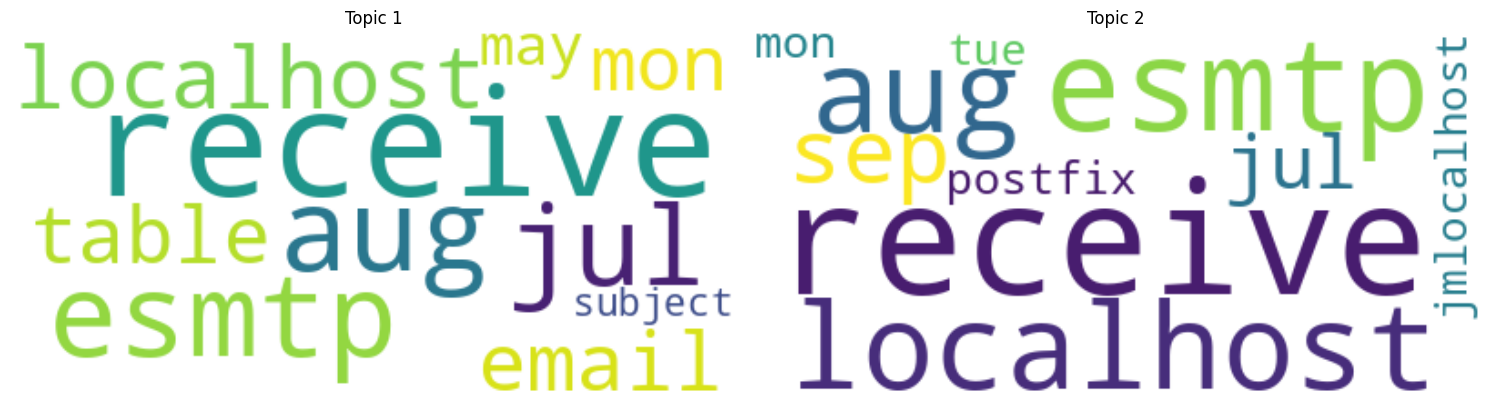

In [ ]:
# Write your code here
from wordcloud import WordCloud
topic_words = {
    'Topic 1': {
        'receive': 0.0605,
        'aug': 0.0343,
        'esmtp': 0.0340,
        'jul': 0.0313,
        'localhost': 0.0303,
        'email': 0.0263,
        'table': 0.0248,
        'mon': 0.0241,
        'may': 0.0236,
        'subject': 0.0206
    },
    'Topic 2': {
        'receive': 0.0727,
        'esmtp': 0.0481,
        'localhost': 0.0417,
        'aug': 0.0398,
        'sep': 0.0353,
        'jul': 0.0286,
        'postfix': 0.0276,
        'mon': 0.0271,
        'jmlocalhost': 0.0253,
        'tue': 0.0244
    }
}

# Plotting word clouds
plt.figure(figsize=(15, 10))
for i, (topic, words) in enumerate(topic_words.items()):
    plt.subplot(1, 2, i + 1)  # Adjust layout as needed
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic)

plt.tight_layout()
plt.show()

Explaination:
the word cloud visualization effectively summarizes the most significant words associated with each topic,
facilitating a better understanding of the underlying themes within the data. By examining these visualizations,
analysts can draw insights into the nature of the topics and how they relate to one another, guiding further exploration
or decision-making based on this thematic analysis.

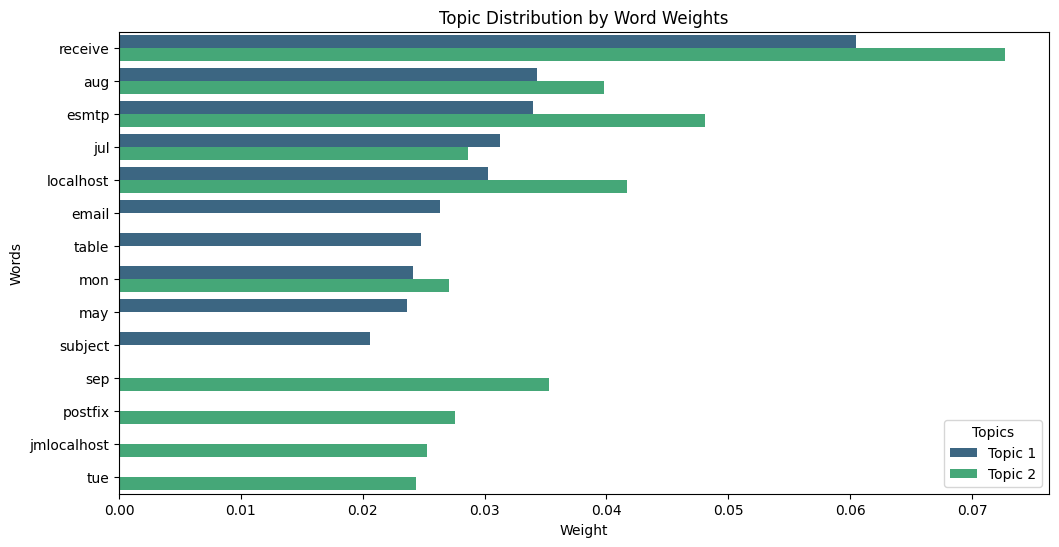

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample topic weights based on your input
topic_weights = {
    'Topic 1': {
        'receive': 0.0605,
        'aug': 0.0343,
        'esmtp': 0.0340,
        'jul': 0.0313,
        'localhost': 0.0303,
        'email': 0.0263,
        'table': 0.0248,
        'mon': 0.0241,
        'may': 0.0236,
        'subject': 0.0206
    },
    'Topic 2': {
        'receive': 0.0727,
        'esmtp': 0.0481,
        'localhost': 0.0417,
        'aug': 0.0398,
        'sep': 0.0353,
        'jul': 0.0286,
        'postfix': 0.0276,
        'mon': 0.0271,
        'jmlocalhost': 0.0253,
        'tue': 0.0244
    }
}

# Preparing the data for visualization
data = []
for topic, words in topic_weights.items():
    for word, weight in words.items():
        data.append({'Topic': topic, 'Word': word, 'Weight': weight})

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Weight', y='Word', hue='Topic', palette='viridis')
plt.title('Topic Distribution by Word Weights')
plt.xlabel('Weight')
plt.ylabel('Words')
plt.legend(title='Topics')
plt.show()

Explaination:
The provided code generates a bar chart visualizing the weight of each word associated with Topic 1 and Topic 2.
Each bar represents a word, with its length indicating the weight (or significance) of that word within the topic.
The chart distinguishes between the two topics using different colors, allowing for easy comparison of the importance of various words across topics.
This visualization effectively highlights key terms and their relative relevance in the context of the topics analyzed.

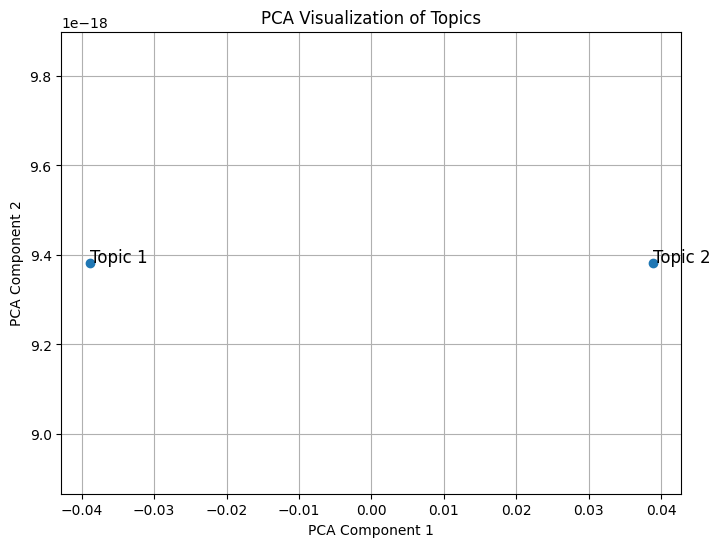

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Define the weights for the words in each topic
topic_words = {
    'Topic 1': {
        'receive': 0.0605,
        'aug': 0.0343,
        'esmtp': 0.0340,
        'jul': 0.0313,
        'localhost': 0.0303,
        'email': 0.0263,
        'table': 0.0248,
        'mon': 0.0241,
        'may': 0.0236,
        'subject': 0.0206
    },
    'Topic 2': {
        'receive': 0.0727,
        'esmtp': 0.0481,
        'localhost': 0.0417,
        'aug': 0.0398,
        'sep': 0.0353,
        'jul': 0.0286,
        'postfix': 0.0276,
        'mon': 0.0271,
        'jmlocalhost': 0.0253,
        'tue': 0.0244
    }
}

# Extract unique words and create an embedding for each topic
unique_words = set(word for topic in topic_words.values() for word in topic.keys())
embeddings = np.zeros((len(topic_words), len(unique_words)))

# Create a mapping of words to indices
word_to_index = {word: i for i, word in enumerate(unique_words)}

# Populate the embeddings based on the word frequencies
for i, (topic, words) in enumerate(topic_words.items()):
    for word, weight in words.items():
        embeddings[i, word_to_index[word]] = weight

# Apply PCA to the embeddings
pca = PCA(n_components=2)
topic_embeddings_pca = pca.fit_transform(embeddings)

# Plotting the PCA visualization
plt.figure(figsize=(8, 6))
plt.scatter(topic_embeddings_pca[:, 0], topic_embeddings_pca[:, 1], marker='o')

# Annotate the points with topic labels
for i, topic in enumerate(topic_words.keys()):
    plt.annotate(topic, (topic_embeddings_pca[i, 0], topic_embeddings_pca[i, 1]), fontsize=12)

plt.title('PCA Visualization of Topics')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

Explaination:
The provided code visualizes the relationship between two topics using Principal Component Analysis (PCA) to reduce the dimensionality of word weights.
It constructs an embedding matrix from the weights of the top words in each topic, applies PCA to transform the data into a 2D space,
and then creates a scatter plot where each point represents a topic. The topics are labeled for easy identification, allowing for insights
into their similarities and differences based on word distributions.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
It is necessary to take into account a number of factors when comparing the outcomes of various topic modeling algorithms, such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic. These factors include the algorithms' methodologies, interpretability, performance on particular datasets, and the type of topics that are extracted.

Latent Dirichlet Allocation (LDA)

Approach: Probabilistic generative model
Core Assumption: Documents are mixtures of topics, and topics are mixtures of words
Mathematical Foundation: Uses Dirichlet distribution and Bayesian inference
Document Representation: Bag-of-words

Latent Semantic Analysis (LSA)

Approach: Linear algebraic model
Core Assumption: Words with similar meanings appear in similar contexts
Mathematical Foundation: Singular Value Decomposition (SVD)
Document Representation: Term-document matrix

lda2vec

Approach: Hybrid model combining word embeddings with LDA
Core Assumption: Topics can be better represented using word embeddings
Mathematical Foundation: Neural networks and word embeddings
Document Representation: Dense word vectors

BERTopic

Approach: Transformer-based model with clustering
Core Assumption: Contextual embeddings capture better semantic relationships
Mathematical Foundation: BERT embeddings + UMAP + HDBSCAN
Document Representation: Contextual embeddings

In summary, BERTopic is often considered one of the most powerful methods in modern topic modeling due to its use of BERT embeddings and advanced clustering techniques, making it suitable for a wide range of datasets. However, for simpler tasks or when computational resources are limited, LDA remains a strong and interpretable choice. Ultimately, the best approach may involve testing multiple algorithms and evaluating their results based on the specific context and goals of the analysis.
'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [5]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Learning Experience:

It has been a really interesting learning experience to work with text data and use topic modeling techniques.
Through this task, I was able to investigate the subtleties of text representation and go extensively into feature extraction approaches.
I developed a strong grasp of how to examine and identify significant patterns in textual data by practically putting many topic modeling methods,
including Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF), into practice. Every algorithm uncovered different facets of the dataset,
which enabled me to recognize their distinctive advantages and methods.
Experimenting with various parameters and preprocessing techniques also helped me better grasp the intricacy of text data and the significance of meticulous feature extraction.

Challenges Encountered:

Comprehending the complexities of each algorithm and optimizing it for best outcomes was one of the biggest obstacles.
The unstructured and noisy nature of text data necessitated extensive preprocessing and feature extraction.
Particularly with larger datasets, I occasionally struggled to strike a compromise between preserving computational speed and capturing adequate context.
Furthermore, evaluating topic model results was difficult because it necessitated a sophisticated comprehension of both the data and the model outputs,
particularly when the topics are very abstract or overlap.

Relevance to My Field of Study (Data Science/NLP):

Specifically, this behavior is intimately relevant to my field of study, Natural Language Processing (NLP).
A basic text analytics method, topic modeling is frequently employed in natural language processing (NLP) operations like sentiment assessment,
recommendation systems, and data retrieval. In addition to learning more about natural language processing (NLP),
this project gave me useful advice for handling textual data in everyday situations.
Data science practitioners who wish to work with unorganized information must possess these abilities because written information has grown into a more significant source of knowledge.

'''

'\n\n\n\n\n\n\n'